In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

# Remove limits on viewing dataframes
pd.set_option('display.max_columns', None)

## Question One: Iris Data

Use the function defined in acquire.py to load the iris data.

In [2]:
iris_df = acquire.get_iris_data()

In [3]:
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [5]:
iris_df.describe()

,species_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,6.400000,3.300000,5.100000,1.800000
max,3.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.species_name.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species_name, dtype: int64

Drop the species_id and measurement_id columns.

In [7]:
iris_df.drop(columns=['species_id'], inplace=True)
iris_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


Rename the species_name column to just species.

In [8]:
iris_df.rename(columns={'species_name':'species'}, inplace=True)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


Create dummy variables of the species name and concatenate onto the iris dataframe.

In [9]:
dummy_iris = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=[True])
dummy_iris.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [10]:
iris_df = pd.concat([iris_df, dummy_iris], axis=1)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [11]:
def prep_iris(iris_df):
    iris_df.drop(columns=['species_id'], inplace=True)
    iris_df.rename(columns={'species_name':'species'}, inplace=True)
    dummy_iris = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=[True])
    iris_df = pd.concat([iris_df, dummy_iris], axis=1)
    return iris_df

In [12]:
iris_df = acquire.get_iris_data()
iris_df = prep_iris(iris_df)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


## Question Two: Titanic Data

Demonstrated a solution during lesson

## Question Three: Telco Data

Using the Telco dataset

Use the function defined in acquire.py to load the Telco data.

Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

## Step 1: Summarizing (With Prep as Needed)

In [13]:
raw_data = acquire.get_telco_data()
raw_data.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,1,1,2,2794-XIMMO,Male,0,Yes,No,53,No,No phone service,No,Yes,Yes,Yes,Yes,Yes,Yes,60.45,3184.25,Yes,One year,DSL,Electronic check
1,1,1,2,2851-STERV,Male,1,No,No,35,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,73.00,2471.25,No,One year,DSL,Electronic check
2,1,1,2,2898-LSJGD,Female,0,Yes,Yes,21,No,No phone service,Yes,No,Yes,No,Yes,Yes,Yes,55.95,1157.05,Yes,One year,DSL,Electronic check
3,1,1,2,2969-WGHQO,Female,0,Yes,Yes,7,Yes,No,Yes,Yes,Yes,No,Yes,No,No,69.45,477.05,No,One year,DSL,Electronic check
4,1,1,2,2988-PLAHS,Female,0,No,No,3,Yes,No,No,No,Yes,No,Yes,Yes,Yes,69.95,220.45,No,One year,DSL,Electronic check


How are the id columns related to the non-id columns with the same names?

In [14]:
pd.crosstab(raw_data.internet_service_type_id, raw_data.internet_service_type)

internet_service_type,DSL,Fiber optic,None
internet_service_type_id,,,
1,2421,0,0
2,0,3096,0
3,0,0,1526


In [15]:
pd.crosstab(raw_data.contract_type_id, raw_data.contract_type)

contract_type,Month-to-month,One year,Two year
contract_type_id,,,
1,3875,0,0
2,0,1473,0
3,0,0,1695


In [16]:
pd.crosstab(raw_data.payment_type_id, raw_data.payment_type)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
payment_type_id,,,,
1,0,0,2365,0
2,0,0,0,1612
3,1544,0,0,0
4,0,1522,0,0


In [17]:
df = raw_data.copy()

**Note**: `payment_type_id`, `internet_service_type_id`, and `contract_type_id` are all duplicated by `payment_type`, `internet_service_type`, and `contract_type`. We can drop the id columns. `customer_id` may not be necessary either. We can drop it for now and if we end up needing it in the end for some reason, we can go back and change that.

In [18]:
df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

**Note**: Total charges is showing as an object value instead of a float value. Before we can visualize this in our summary process, we will need to clean this. 

In [20]:
df['total_charges'].value_counts()

20.2       11
           11
19.75       9
19.9        8
19.65       8
           ..
1334.45     1
609.1       1
2642.05     1
7711.45     1
2172.05     1
Name: total_charges, Length: 6531, dtype: int64

The `total_charges` column contains whitespace characters. Lets see what those are connected to:

In [21]:
df[df.total_charges == ' ']

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
5125,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
5141,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
5261,Male,0,No,Yes,0,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
5293,Female,0,Yes,Yes,0,No,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
5445,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
6204,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.70,,No,One year,None,Mailed check
6676,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
6686,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
6688,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
6720,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check


In [22]:
df[df.tenure == 0]

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
5125,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
5141,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
5261,Male,0,No,Yes,0,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
5293,Female,0,Yes,Yes,0,No,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
5445,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
6204,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.70,,No,One year,None,Mailed check
6676,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
6686,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
6688,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
6720,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check


It looks like customers with zero tenure have no total charges, and this is being represented by the whitespace character. Because the end goal of this preparation is to make the dataframe ready for a classification model with the target being churn, customers who have no possible way of churning should not be included in the model. We can drop these rows.

In [23]:
df['total_charges'] = df['total_charges'].str.strip()

In [24]:
df = df[df.total_charges != '']

In [25]:
# Confirm that these rows were dropped
df[df.tenure == 0]

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


In [26]:
# Convert datatype
df['total_charges'] = df.total_charges.astype(float)

In [27]:
# View numeric summary statistics
df.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


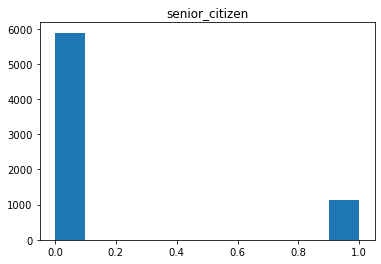

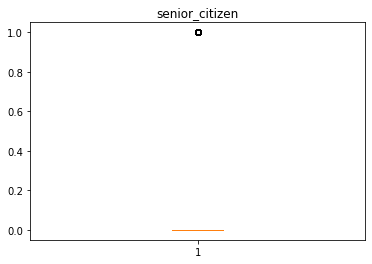

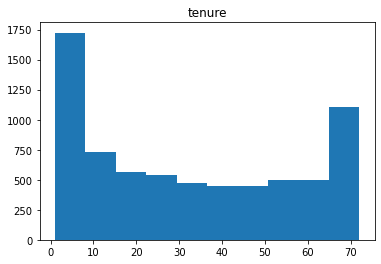

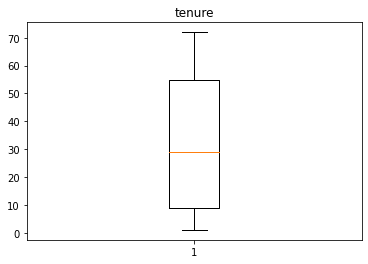

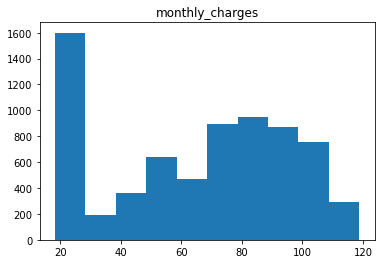

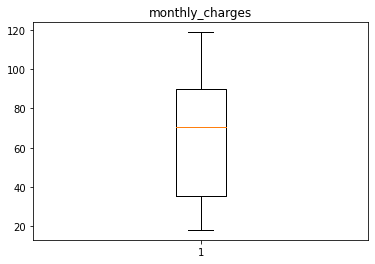

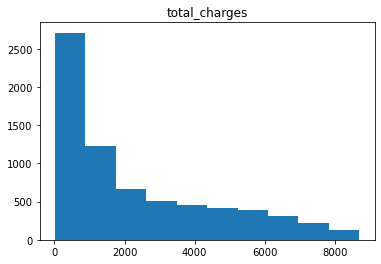

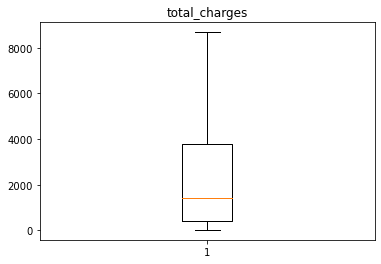

In [28]:
# Plot numeric columns
num_cols = df.columns[[(df[col].dtype == 'int64') or (df[col].dtype == 'float64') for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [29]:
# Use .describe with object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn',
       'contract_type', 'internet_service_type', 'payment_type'],
      dtype='object')

In [30]:
for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

GENDER
Count:
Male      3549
Female    3483
Name: gender, dtype: int64


Proportions:
Male      0.504693
Female    0.495307
Name: gender, dtype: float64
--------------------------


PARTNER
Count:
No     3639
Yes    3393
Name: partner, dtype: int64


Proportions:
No     0.517491
Yes    0.482509
Name: partner, dtype: float64
--------------------------


DEPENDENTS
Count:
No     4933
Yes    2099
Name: dependents, dtype: int64


Proportions:
No     0.701507
Yes    0.298493
Name: dependents, dtype: float64
--------------------------


PHONE_SERVICE
Count:
Yes    6352
No      680
Name: phone_service, dtype: int64


Proportions:
Yes    0.903299
No     0.096701
Name: phone_service, dtype: float64
--------------------------


MULTIPLE_LINES
Count:
No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64


Proportions:
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: multiple_lines, dtype: float64
-

## Step 2: Prepping

Simple encoding for variables with only two possible values:

In [31]:
# encode binary categorical variables into numeric values
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

Using get_dummies

In [32]:
dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
dummy_df

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
7039,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
7040,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
7041,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0


In [33]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Male,0,Yes,No,53,No,No phone service,No,Yes,Yes,Yes,Yes,Yes,Yes,60.45,3184.25,Yes,One year,DSL,Electronic check,0,1,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0
1,Male,1,No,No,35,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,73.00,2471.25,No,One year,DSL,Electronic check,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0
2,Female,0,Yes,Yes,21,No,No phone service,Yes,No,Yes,No,Yes,Yes,Yes,55.95,1157.05,Yes,One year,DSL,Electronic check,1,1,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0
3,Female,0,Yes,Yes,7,Yes,No,Yes,Yes,Yes,No,Yes,No,No,69.45,477.05,No,One year,DSL,Electronic check,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,Female,0,No,No,3,Yes,No,No,No,Yes,No,Yes,Yes,Yes,69.95,220.45,No,One year,DSL,Electronic check,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0


New features: Most of these are garbage and have multiple issues with keeping them - think critically about whether any of these should be used (do they actually supply new information not already represented by the existing fields?) and if they need to be one-hot encoded if kept. 

In [34]:
# encode number_relationships by utilizing information from dependents_encoded and partner_encoded
df['number_relationships'] = df['dependents_encoded'] + df['partner_encoded']

# convert streaming_tv into numeric data
df['streaming_tv_bool'] = df.streaming_tv.map({'Yes': 1, 'No': 0, 'No internet service': 0})

# convert streaming_movies into numeric data
df['streaming_movies_bool'] = df.streaming_movies.map({'Yes': 1, 'No': 0, 'No internet service': 0}) 

# encode number_streaming_services by utilizing information from streaming_tv_encoded and streaming_movies_encoded
df['number_streaming_services'] = df['streaming_tv_bool'] + df['streaming_movies_bool']

# convert online_security into numeric data
df['online_security_bool'] = df.online_security.map({'Yes': 1, 'No': 0, 'No internet service': 0})

# convert online_backup into numeric data
df['online_backup_bool'] = df.online_backup.map({'Yes': 1, 'No': 0, 'No internet service': 0}) 

# encode number_online_services by utilizing information from online_security_encoded and online_backup_encoded
df['number_online_services'] = df['online_security_bool'] + df['online_backup_bool']

# encode tenure in years (rounded down) by utilizing information from tenure (currently stored in months)
df['yearly_tenure'] = df.tenure.apply(lambda x: math.floor(x/12))

# encode has_internet
df['has_internet'] = df.internet_service_type.apply(lambda x: 0 if x == 'None' else 1)

## Step 3: Splitting

In [35]:
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)

In [36]:
train.shape

(3937, 56)

In [37]:
validate.shape

(1688, 56)

In [38]:
test.shape

(1407, 56)

## Step 4: Turning into Functions

In [39]:
def split_telco_data(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.2, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [40]:
def prep_telco_data(df):
    # Drop duplicate columns
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
       
    # Drop null values stored as whitespace    
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    
    # Convert to correct datatype
    df['total_charges'] = df.total_charges.astype(float)
    
    # Convert binary categorical variables to numeric
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    
    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    
    # Concatenate dummy dataframe to original 
    df = pd.concat([df, dummy_df], axis=1)
    
    # split the data
    train, validate, test = split_telco_data(df)
    
    return train, validate, test